In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/My Drive/SKELETON_DATA/Position_and_Rotation_Invariant_SLR.zip' -d .

Archive:  /content/drive/My Drive/SKELETON_DATA/Position_and_Rotation_Invariant_SLR.zip
   creating: ./combined/
  inflating: ./combined/afternoon_apurve_1.txt  
  inflating: ./combined/afternoon_apurve_2.txt  
  inflating: ./combined/afternoon_apurve_3.txt  
  inflating: ./combined/afternoon_apurve_4.txt  
  inflating: ./combined/afternoon_apurve_5.txt  
  inflating: ./combined/afternoon_apurve_6.txt  
  inflating: ./combined/afternoon_apurve_7.txt  
  inflating: ./combined/afternoon_apurve_8.txt  
  inflating: ./combined/afternoon_apurve_9.txt  
  inflating: ./combined/afternoon_gautam_1.txt  
  inflating: ./combined/afternoon_gautam_2.txt  
  inflating: ./combined/afternoon_gautam_3.txt  
  inflating: ./combined/afternoon_gautam_4.txt  
  inflating: ./combined/afternoon_gautam_5.txt  
  inflating: ./combined/afternoon_gautam_6.txt  
  inflating: ./combined/afternoon_gautam_7.txt  
  inflating: ./combined/afternoon_gautam_8.txt  
  inflating: ./combined/afternoon_gautam_9.txt  
  inf

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn import preprocessing
import math
import os
import pandas as pd

In [ ]:
import pandas as pd
import os
path='/content/combined/'
label_dict={}
label=[]
cnt=0
new_df=pd.DataFrame(columns=[x for x in range])
for root_dir,dirs,files in os.walk(path):
    for fil in files:
        if fil.endswith('.txt'):
            file_path=os.path.join(root_dir,fil)
            df=pd.read_csv(file_path,header=None,delimiter=' ')
            x=fil.split('_')
            if not (x[0] in label_dict):
              cnt+=1
              label_dict[x[0]]=True
            for i in range(df.shape[0]):
              ar=np.reshape(np.array(df.iloc[i,:]),(60))
              mat=rot(ar)
              label.append(cnt)
              new_df.loc[len(new_df)]=mat

              ## longer time

In [4]:
data=[]
labels=[]
train_dir="/content/combined/"
for _dir, subdir, files in os.walk(train_dir):
    for files in files:
        name=files.split('_')
        lines=open(os.path.join(os.path.abspath(_dir),files)).readlines()
        for line in lines:
            words= line.split(' ')
            row=[]
            for word in words:
                row.append(float(word))
            data.append(row)
            labels.append(name[0])

In [5]:
labels_dict={}
cnt=0
for i in range(len(labels)):
    if(labels[i] in labels_dict):
        labels[i]=int(labels_dict[labels[i]])
    else:
        labels_dict[labels[i]]=cnt
        labels[i]=cnt
        cnt+=1
labels=np.array(labels)

In [6]:
len(data)

201054

In [7]:
len(data[0])

60

In [8]:
def plt_skeleton(dt,elev=0,azi=0):
    x_pt=[dt[x] for x in range(60) if (x%3==0)] 
    y_pt=[dt[y] for y in range(60) if (y%3==1)] 
    z_pt=[-dt[z] for z in range(60) if (z%3==2)] 
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    plt.title('Skeleton Plot')
    bone_list=[[0,1],[1,2],[1,3],[2,4],[4,6],[6,8],[3,5],[5,7],[7,9],[1,10],[10,11],[11,12],[12,14],[14,16],[16,18],[11,13],[13,15],[15,17],[17,19]]
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    # print(bone_list)
    ax.scatter3D(x_pt,y_pt,z_pt,s=10)
    # plt.plot(x_pt,y_pt,x_pt)
    for i in range(20):
      ax.text(x_pt[i],y_pt[i],z_pt[i],i)
    for bone in bone_list:
        ax.plot([x_pt[bone[0]], x_pt[bone[1]]], [y_pt[bone[0]], y_pt[bone[1]]],[z_pt[bone[0]], z_pt[bone[1]]], 'r')
    ax.view_init(elev,azi)

In [9]:
l=3
r=2
c=10

In [21]:
def rot(dt):
  z_pt=[]
  x_pt=[]
  y_pt=[]
  xc=dt[3*c]
  yc=dt[3*c+1]
  zc=dt[3*c+2]
  for x in range(60):
    if (x%3==0):
      x_pt.append(dt[x]-xc)
    elif (x%3==1):
      y_pt.append(dt[x]-yc)
    else:
      z_pt.append(dt[x]-zc)
  rvec=np.reshape(np.array([x_pt[r],y_pt[r],z_pt[r]]),(1,3))
  lvec=np.reshape(np.array([x_pt[l],y_pt[l],z_pt[l]]),(1,3))
  cvec=np.reshape(np.array([x_pt[c],y_pt[c],z_pt[c]]),(1,3))
  cl=lvec-cvec
  cr=rvec-cvec
  cl=cl/np.linalg.norm(cl)
  cr=cr/np.linalg.norm(cr)
  vec=np.cross(cl,cr)
  costheta=vec[0][2]
  theta=math.acos(costheta)
  cs,sn=np.cos(theta),np.sin(theta)
  rot_mat=np.array(((cs,0,sn),(0,1,0),(-sn,0,cs)))
  new_dt=[]
  for i  in range(20):
    vec=np.reshape(np.array([x_pt[i],y_pt[i],z_pt[i]]),(3,1))
    new_vec=np.dot(rot_mat,vec)
    new_dt.append(new_vec[0][0])
    new_dt.append(new_vec[1][0])
    new_dt.append(new_vec[2][0])
  return new_dt

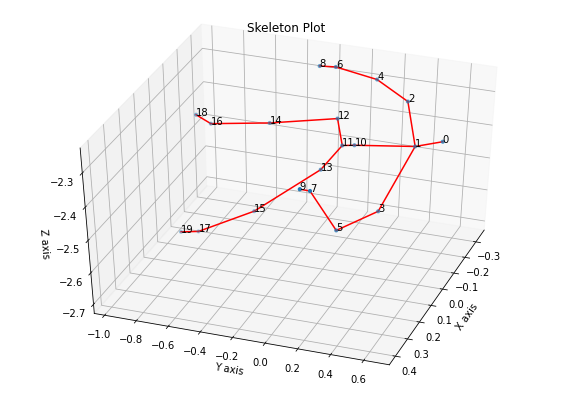

In [19]:
plt_skeleton(data[0],40,20)# plot of one of the frames in the input

In [22]:
mat=rot(data[0])

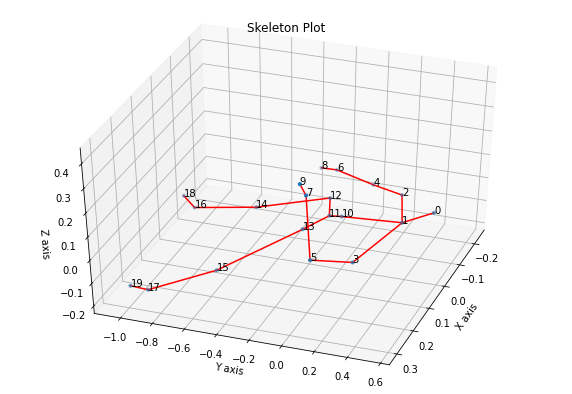

In [23]:
plt_skeleton(mat,40,20)# rotated and translated plot of the keyponts used in above plot

In [42]:
new_data=[]
for i in range(len(data)):
  x=rot(data[i])
  new_data.append(x)
  print(i)

Streaming output truncated to the last 5000 lines.
196055
196056
196057
196058
196059
196060
196061
196062
196063
196064
196065
196066
196067
196068
196069
196070
196071
196072
196073
196074
196075
196076
196077
196078
196079
196080
196081
196082
196083
196084
196085
196086
196087
196088
196089
196090
196091
196092
196093
196094
196095
196096
196097
196098
196099
196100
196101
196102
196103
196104
196105
196106
196107
196108
196109
196110
196111
196112
196113
196114
196115
196116
196117
196118
196119
196120
196121
196122
196123
196124
196125
196126
196127
196128
196129
196130
196131
196132
196133
196134
196135
196136
196137
196138
196139
196140
196141
196142
196143
196144
196145
196146
196147
196148
196149
196150
196151
196152
196153
196154
196155
196156
196157
196158
196159
196160
196161
196162
196163
196164
196165
196166
196167
196168
196169
196170
196171
196172
196173
196174
196175
196176
196177
196178
196179
196180
196181
196182
196183
196184
196185
196186
196187
196188
196189
1961

In [56]:
df=pd.DataFrame(new_data,columns=[x for x in range(60)])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.028042,0.537429,-0.050590,-0.029030,0.345429,0.014665,-0.158046,0.218150,0.025718,0.176260,0.250117,0.004181,-0.226054,-0.029462,0.068648,0.285041,0.106333,-0.092887,-0.228144,-0.266434,0.030329,0.282643,0.078283,-0.352888,-0.222019,-0.360039,0.025940,0.306654,0.067584,-0.418272,0.0,0.0,0.0,0.006875,-0.069226,-0.002073,-0.067387,-0.142522,-0.003203,0.088313,-0.148270,-0.009417,-0.058820,-0.601315,0.080264,0.191117,-0.571984,0.121285,-0.041457,-0.979905,0.108214,0.254695,-0.932847,0.188746,-0.044202,-1.049989,0.066500,0.273310,-1.018911,0.163021
1,-0.027721,0.539048,-0.051456,-0.027186,0.346230,0.013632,-0.156931,0.218934,0.025212,0.178125,0.250548,0.003626,-0.225358,-0.030005,0.069678,0.281387,0.093014,-0.079367,-0.228863,-0.267619,0.033227,0.274946,0.047164,-0.355464,-0.223234,-0.361338,0.031300,0.296573,0.023772,-0.401133,0.0,0.0,0.0,0.006368,-0.069490,-0.001866,-0.067628,-0.142389,-0.001886,0.086645,-0.148312,-0.009813,-0.057364,-0.600750,0.079431,0.192374,-0.571348,0.119537,-0.040046,-0.979092,0.107156,0.256116,-0.932025,0.186544,-0.042948,-1.049126,0.065487,0.309289,-1.012405,0.166747
2,-0.027870,0.540128,-0.052344,-0.025602,0.346953,0.012969,-0.155829,0.219954,0.024995,0.179331,0.250906,0.003063,-0.224410,-0.028764,0.069724,0.277140,0.085796,-0.078074,-0.229958,-0.268348,0.035041,0.255607,0.000509,-0.353042,-0.225032,-0.362122,0.034183,0.278566,-0.020643,-0.388603,0.0,0.0,0.0,0.006044,-0.069624,-0.001968,-0.067597,-0.142089,-0.001546,0.085553,-0.148181,-0.010437,-0.056172,-0.599787,0.078673,0.193744,-0.572561,0.118417,-0.038641,-0.977677,0.106632,0.257398,-0.933042,0.185038,-0.041675,-1.047804,0.064741,0.314122,-1.011511,0.165904
3,-0.027251,0.541707,-0.053338,-0.024084,0.348124,0.012275,-0.154816,0.221452,0.025267,0.179890,0.252387,0.002534,-0.223166,-0.027251,0.070212,0.271671,0.078686,-0.076521,-0.230845,-0.266496,0.037294,0.241317,-0.007506,-0.296518,-0.224940,-0.360202,0.035552,0.251648,-0.036071,-0.383749,0.0,0.0,0.0,0.005750,-0.069858,-0.002136,-0.067214,-0.141430,-0.001023,0.084246,-0.147870,-0.011474,-0.054678,-0.598864,0.078076,0.195440,-0.571117,0.116379,-0.036170,-0.978092,0.105835,0.259076,-0.930612,0.182495,-0.040291,-1.046671,0.064104,0.325672,-1.006912,0.160272
4,-0.027301,0.542472,-0.053797,-0.023358,0.348578,0.011895,-0.154676,0.222140,0.025919,0.180430,0.252912,0.002989,-0.222887,-0.026770,0.070124,0.263611,0.068895,-0.075891,-0.232868,-0.268735,0.037221,0.226087,-0.020584,-0.287574,-0.225691,-0.362352,0.035436,0.208895,-0.060650,-0.364411,0.0,0.0,0.0,0.005660,-0.069885,-0.002372,-0.067046,-0.141236,-0.000762,0.083681,-0.147575,-0.012238,-0.053957,-0.598390,0.077751,0.196507,-0.571453,0.116057,-0.035385,-0.977298,0.105555,0.259949,-0.930051,0.181941,-0.039951,-1.046021,0.063633,0.324272,-1.005729,0.159476


In [ ]:
df.shape()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(df, labels, test_size=0.1)

In [63]:
from tensorflow import keras
import tensorflow as tf
model= keras.Sequential([
    keras.layers.Input(shape=(60)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(30,activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               7808      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1950      
Total params: 18,014
Trainable params: 18,014
Non-trainable params: 0
_________________________________________________________________


In [64]:
history=model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
5655/5655 [==============================] - 11s 2ms/step - loss: 1.3072 - accuracy: 0.5579
Epoch 2/15
5655/5655 [==============================] - 11s 2ms/step - loss: 0.8652 - accuracy: 0.7018
Epoch 3/15
5655/5655 [==============================] - 11s 2ms/step - loss: 0.7020 - accuracy: 0.7567
Epoch 4/15
5655/5655 [==============================] - 11s 2ms/step - loss: 0.5909 - accuracy: 0.7945
Epoch 5/15
5655/5655 [==============================] - 11s 2ms/step - loss: 0.5018 - accuracy: 0.8270
Epoch 6/15
5655/5655 [==============================] - 11s 2ms/step - loss: 0.4346 - accuracy: 0.8509
Epoch 7/15
5655/5655 [==============================] - 11s 2ms/step - loss: 0.3812 - accuracy: 0.8709
Epoch 8/15
5655/5655 [==============================] - 11s 2ms/step - loss: 0.3359 - accuracy: 0.8861
Epoch 9/15
5655/5655 [==============================] - 11s 2ms/step - loss: 0.3002 - accuracy: 0.8988
Epoch 10/15
5655/5655 [==============================] - 11s 2ms/step - l

dict_keys(['loss', 'accuracy'])


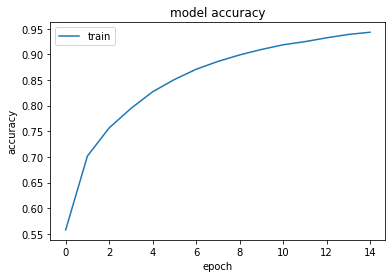

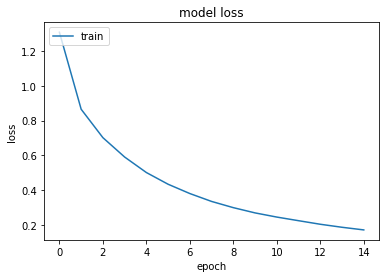

In [68]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [69]:
test_loss, test_acc= model.evaluate(X_test, Y_test)
print('Test : ',test_acc)

629/629 [==============================] - 1s 2ms/step - loss: 0.1800 - accuracy: 0.9415
Test :  0.941510021686554
